## 1. Importing Libraries:

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Reading and understanding the data:

In [2]:
lead_data = pd.read_csv("Leads.csv")
lead_data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [3]:
lead_data.shape

(9240, 37)

In [4]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are total of 9240 rows and 37 columns in the data.

Let's check the data and do the required data cleaning process!

## 3. Cleaning the data:

### 3.1 Checking unwanted columns:

In [5]:
sum(lead_data.duplicated(subset = 'Prospect ID')) == 0

True

In [6]:
sum(lead_data.duplicated(subset = 'Lead Number')) == 0

True

Here, we can see that **"Prospect ID"** and **"Lead Number"** are the two columns that have all unique values.

Hence we can drop those 2 columns!

In [7]:
# Dropping the columns
lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 3.2 Converting "Select" entires to NaN values: 
As we can see in the data, there are a lot of "Select" entries because the potential customers didn't fill any detail in those
fields. Hence, they can be considered at NaN values.

In [8]:
# Converting "Select" entries to NaN
lead_data = lead_data.replace('Select', np.nan)

### 3.3 Checking null values:

In [9]:
# Finding total null values
lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [10]:
# Null values in percentages
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### 3.4 Dealing with Null values

#### 3.4.1 Removing columns with more than 30% null values

As we can see here, there are a lot of null values in many columns.

Let us remove columns having **more than 30%** of null values!

In [11]:
#  Removing columns having more than 30% of null values
col = lead_data.columns
for i in col:
    if((100*(lead_data[i].isnull().sum()/len(lead_data.index))) >= 30):
        lead_data.drop(i, axis = 1, inplace = True)
    
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [12]:
len(lead_data.columns)

25

#### 3.4.2 Looking at individual columns with high % of null values

##### 1) Column: Country

Since "Country" is a categorical column, let's us check the mode.

In [13]:
lead_data.Country.mode()

0    India
dtype: object

Now, since the mode is "India", let us **impute all the Null/NaN values with "India"**.

In [14]:
lead_data['Country'] = lead_data['Country'].replace(np.nan,'India')
lead_data.Country.value_counts(dropna = False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
South Africa               4
Germany                    4
Kuwait                     4
Nigeria                    4
Sweden                     3
China                      2
Uganda                     2
Italy                      2
Asia/Pacific Region        2
Ghana                      2
Belgium                    2
Netherlands                2
Bangladesh                 2
Philippines                2
Indonesia                  1
Malaysia                   1
Vietnam                    1
Kenya                      1
Switzerland                1
Liberia                    1
Russia        

In [15]:
# Percentage of value counts in the column
round(100*(lead_data.Country.value_counts(dropna = False)/len(lead_data.Country)),2)

India                   96.89
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
France                   0.06
Oman                     0.06
unknown                  0.05
Canada                   0.04
South Africa             0.04
Germany                  0.04
Kuwait                   0.04
Nigeria                  0.04
Sweden                   0.03
China                    0.02
Uganda                   0.02
Italy                    0.02
Asia/Pacific Region      0.02
Ghana                    0.02
Belgium                  0.02
Netherlands              0.02
Bangladesh               0.02
Philippines              0.02
Indonesia                0.01
Malaysia                 0.01
Vietnam                  0.01
Kenya                    0.01
Switzerland              0.01
Liberia   

As we can see, the Country column has almost 97% values as "India", hence the column can be considered as redundant.

**Hence, we can drop the column**.

In [16]:
lead_data = lead_data.drop(['Country'],axis = 1)

In [17]:
"Country" in lead_data

False

Column has been removed!

##### 2) Column: Specialization

In [18]:
#lead_data.Specialization.value_counts(dropna=False)

We know from the data dictionary, that this column asks about the **domain in which the lead worked before**.

So here, 2 scenarios are possible:
- The leads may be students (reason why they didn't chose any specialization)
- The specialization of choice is not available

**Let us rename the NaN entries as "Not Specified"**.

In [19]:
#lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan,'Not Specified')

In [20]:
#lead_data.Specialization.value_counts(dropna=False)

##### 3) Column: What is your current occupation

In [21]:
lead_data['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Here, Mode of the column is "Unemployed". Hence imputing NaN values with "Unemployed".

In [22]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan,"Unemployed")

In [23]:
lead_data['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

##### 4) Column: What matters most to you in choosing a course

In [24]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Here also, it makes sense to replace NaN values with "Better Career Prospects", which is also the mode!

In [25]:
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [26]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### Checking percentage null values once again: 

In [27]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Receive More Updates About O

Null values are dealt with!

Let us check other important columns for data cleaning.

### 3.5 Cleaning other important columns:

##### 1) Column: Lead Source

In [28]:
lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
blog                    1
welearnblog_Home        1
NC_EDM                  1
Name: Lead Source, dtype: int64

**We are going to perform following steps on the column**:
- Club "Google" and "google" together
- Put "Facebook" under "Social Media"
- Putting NaN and other low frequency attributes to "Others" for simplification

In [29]:
lead_data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [30]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan,'Others')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('Facebook','Social Media')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing',
                                                             'WeLearn', 'Click2call', 'Live Chat',
                                                             'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
                                                             'NC_EDM'],'Others')

In [31]:
lead_data['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                57
Name: Lead Source, dtype: int64

##### 2) Column: Last Activity

In [32]:
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

**Putting NaN and other low frequency attributes to "Others" for simplification:**

In [33]:
lead_data['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [34]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(np.nan,'Others')
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                                 'Had a Phone Conversation', 'View in browser link Clicked',
                                                                 'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
                                                                 'Resubscribed to emails', 'Email Received',
                                                                 'Email Marked Spam'],'Others')

In [35]:
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
Others                       3053
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

### 3.6 Checking imbalanced columns:

In [36]:
lead_data['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [37]:
lead_data['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [38]:
lead_data['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [39]:
lead_data['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [40]:
lead_data['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [41]:
lead_data['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [42]:
lead_data['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [43]:
lead_data['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [44]:
lead_data['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [45]:
lead_data['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [46]:
lead_data['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [47]:
lead_data['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [48]:
lead_data['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [49]:
lead_data['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

**As evident, following columns are imbalanced ones. Hence it is better to get rid of such columns-** 
- 'Do Not Call'
- 'Search'
- 'Magazine'
- 'Newspaper'
- 'X Education Forums'
- 'Newspaper Article'
- 'Digital Advertisement'
- 'Through Recommendations'
- 'Receive More Updates About Our Courses'
- 'Update me on Supply Chain Content'
- 'Get updates on DM Content'
- 'I agree to pay the amount through cheque'
- 'A free copy of Mastering The Interview'

In [50]:
lead_data = lead_data.drop(['Do Not Call','Search','Magazine','Newspaper','X Education Forums',
                            'Newspaper Article','Digital Advertisement','Through Recommendations',
                            'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                            'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'], axis=1)

In [51]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Unemployed,Better Career Prospects,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,Modified


Now, that the imbalanced columns are removed, let's check the newly obtained dataset!

In [52]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   What is your current occupation                9240 non-null   object 
 9   What matters most to you in choosing a course  9240 

In [53]:
lead_data.isnull().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
What is your current occupation                    0
What matters most to you in choosing a course      0
Last Notable Activity                              0
dtype: int64

### 3.7 Dealing with remaining numerical columns having null values:

In [54]:
# Total visits
lead_data.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [55]:
# Pags views per visit
lead_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

As we can see, we can impute the null values in both columns with their respective mean values!

In [56]:
m1 = lead_data['TotalVisits'].mean()
m1

3.445237833681204

In [57]:
lead_data['TotalVisits'] = lead_data['TotalVisits'].replace(np.nan,m1)

In [58]:
m2 = lead_data['Page Views Per Visit'].mean()
m2

2.3628199494672093

In [59]:
lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].replace(np.nan,m2)

##### Rechecking the dataset for null values:

In [60]:
lead_data.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Last Notable Activity                            0
dtype: int64

In [61]:
lead_data.head(10)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Unemployed,Better Career Prospects,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,Modified
5,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Unemployed,Better Career Prospects,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Unemployed,Better Career Prospects,Modified
7,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Unemployed,Better Career Prospects,Modified
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,Email Opened,Unemployed,Better Career Prospects,Email Opened
9,API,Google,No,0,4.0,58,4.0,Email Opened,Unemployed,Better Career Prospects,Email Opened


The data is now clean and ready for further analysis!

## 4. Exploratory Data Analysis

### 4.1 Univariate Analysis (Numerical Variables):

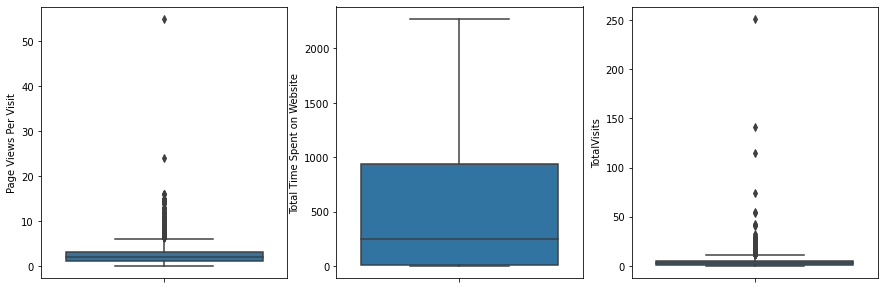

In [62]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y='Page Views Per Visit', data=lead_data)
plt.subplot(1,3,2)
sns.boxplot(y='Total Time Spent on Website', data=lead_data)
plt.subplot(1,3,3)
sns.boxplot(y='TotalVisits', data=lead_data)
plt.show()

As we can see, there is presence of outliers! But here, we won't be dealing with outliers in anyway, since they contain important information.

### 4.2 Univariate Analysis (Categorical Variables):

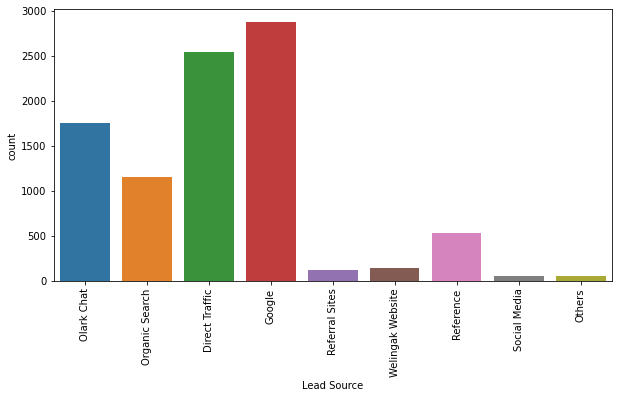

In [63]:
# Lead Source
fig, axs = plt.subplots(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(x = "Lead Source", data = lead_data)

We can see here that most leads are coming from Google!

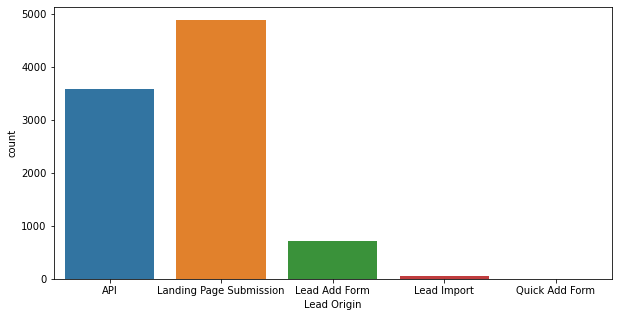

In [64]:
# Lead Origin
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Origin", data = lead_data)

Most of the leads are originating from "Landing Page Submission".

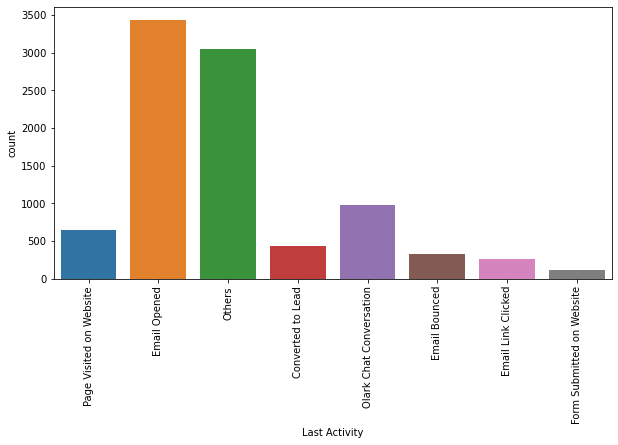

In [65]:
# Last Activity
fig, axs = plt.subplots(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(x = "Last Activity", data = lead_data)

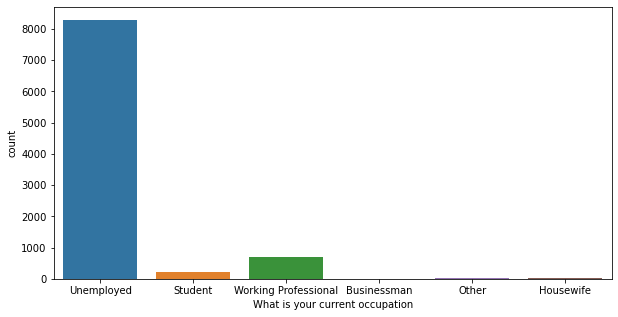

In [66]:
# Current Occupation
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", data = lead_data)

Most of the leads are from the people who are currently not working!

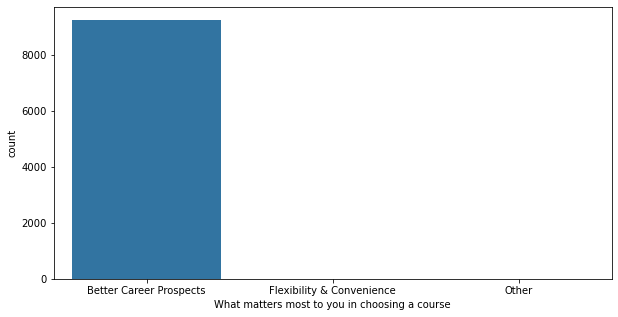

In [67]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What matters most to you in choosing a course", data = lead_data)

In [68]:
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

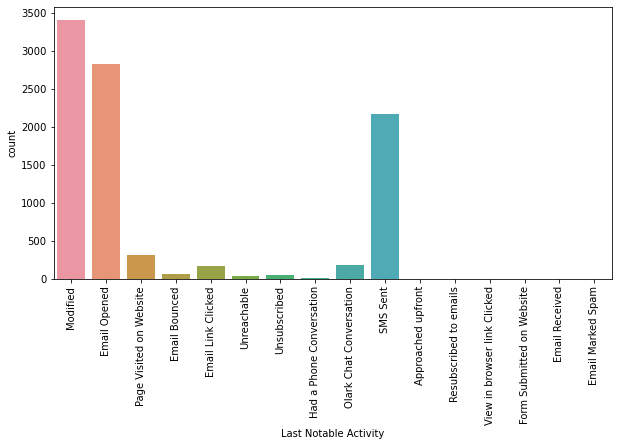

In [69]:
fig, axs = plt.subplots(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(x = "Last Notable Activity", data = lead_data)

### 4.3 Bivariate Analysis

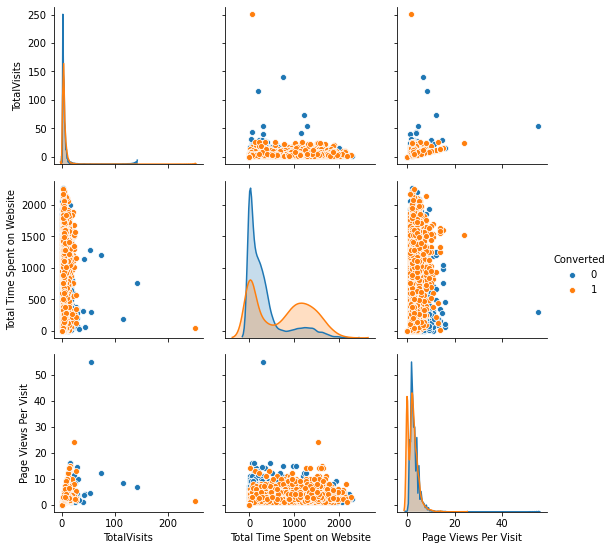

In [70]:
# Plotting pair-plot
sns.pairplot(lead_data,diag_kind='kde',hue='Converted')
plt.show()

#### 4.3.1 Let us first calculate the conversation ratio of the leads:

In [71]:
conv_ratio = round(100*(lead_data['Converted'].sum()/len(lead_data['Converted'])),2)
conv_ratio

38.54

**The CEO of the organization has given a target lead conversion rate to be around 80%.**

Since, "Converted" variable is our central parameter to study the successful conversion of leads, let us study each variable 
w.r.t. it.

#### 4.3.2 Frequency Plotting of each categorical variable for "Converted" variable:

##### 1) Column: Lead Origin

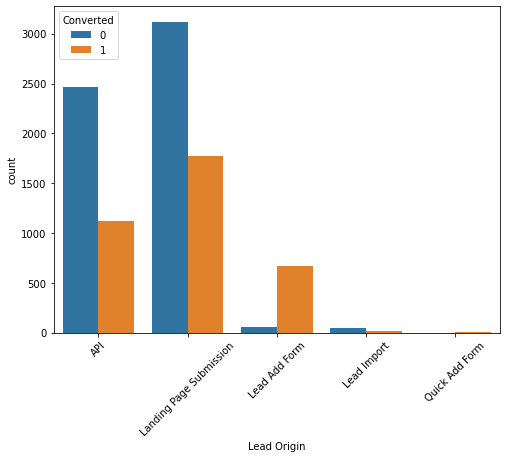

In [72]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.countplot(x='Lead Origin', hue='Converted', data=lead_data)

It is evident, that people who are filling the forms and providing their details are highly probably to buy a course!

##### 2) Column: Lead Source

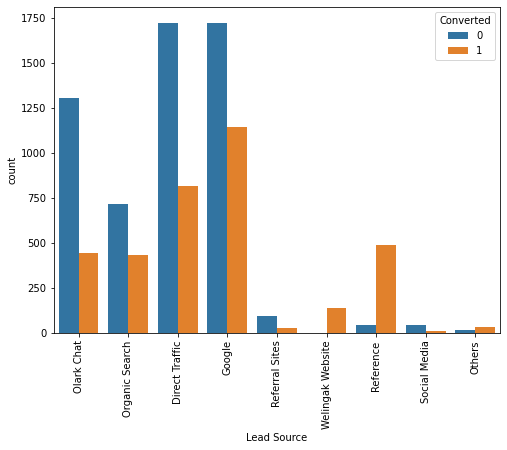

In [73]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(x='Lead Source', hue='Converted', data=lead_data)

For people approaching through Google search, references and Orgnic search, there is a high chance that they will opt for a course!

##### 3) Column: Last Activity

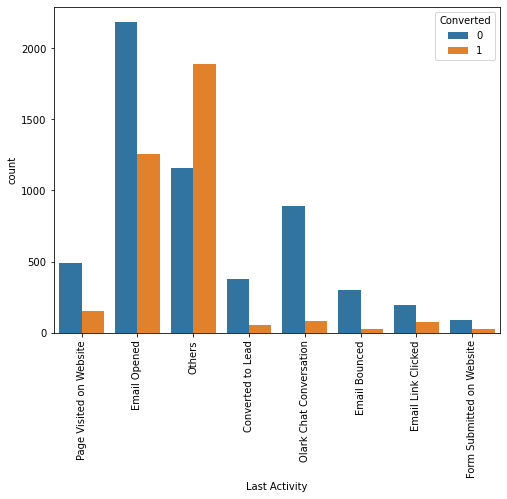

In [74]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(x='Last Activity', hue='Converted', data=lead_data)

##### 4) Column: What is your current occupation

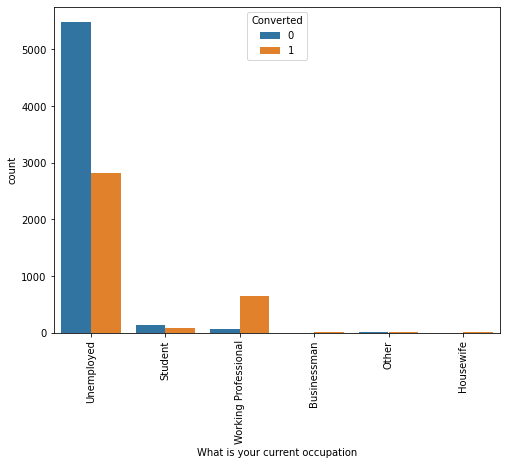

In [75]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(x='What is your current occupation', hue='Converted', data=lead_data)

Working professionals are highly probable of buying a course.

##### 5) Column: What matters most to you in choosing a course

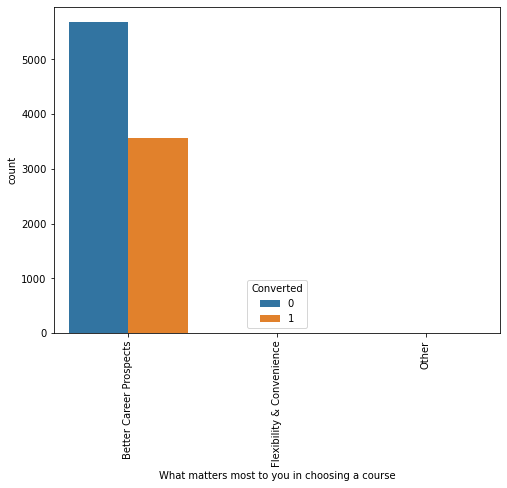

In [76]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=lead_data)

Most of the people are approaching for better career prospects and there is a high chance that those leads will be converted.

##### 6) Column: Last Notable Activity

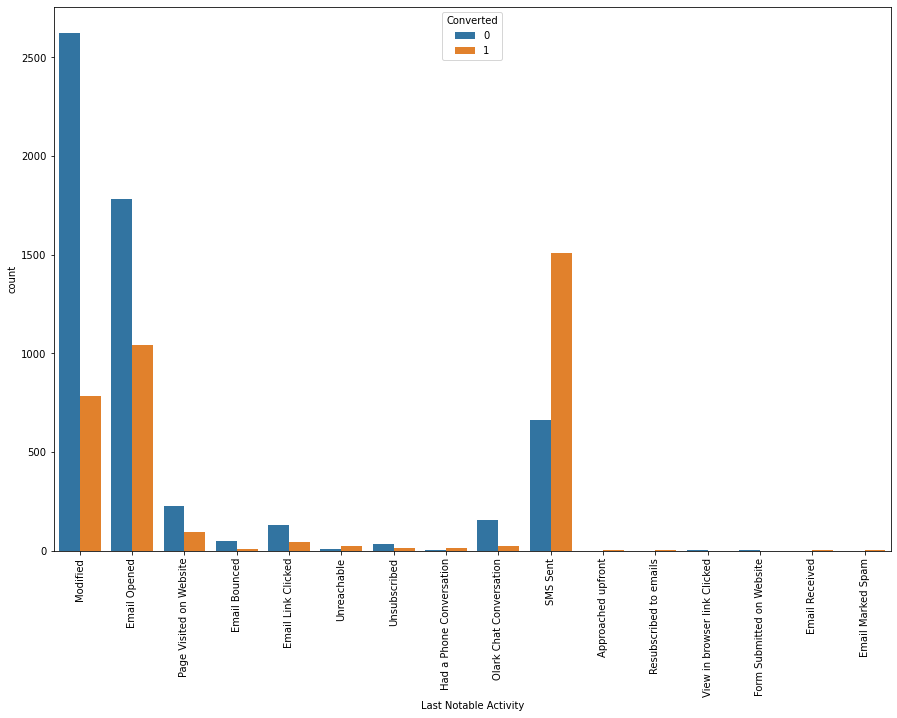

In [77]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Last Notable Activity', hue='Converted', data=lead_data)

People who are approached on direct messages seem to buy the courses on a higher rate!

#### 4.3.3 Boxplot of each numerical variable for "Converted" variable:

##### 1) Column: Total Visits

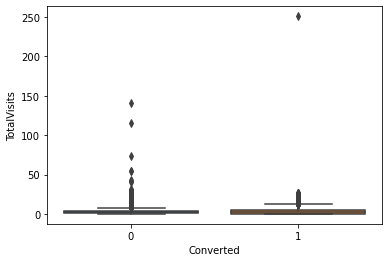

In [78]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

Leads with more no. of total visits are converting at a higher rate!

##### 2) Column: Total Time Spent on Website

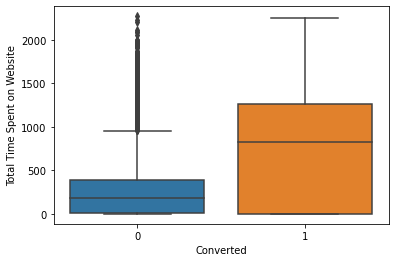

In [79]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)
plt.show()

People who are spending more time on the website, are most probable of buying a course.

##### 2) Column: Page Views Per Visit

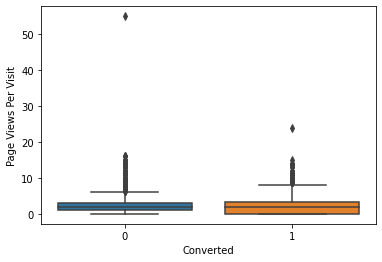

In [80]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)
plt.show()

More pages visited, gets higher chance of lead conversion!

## 5. Dropping columns (provided by sales team):
We need to get rid of the following columns since these are the inputs from the sales team and no contribution from the sales
team is to be considered for the modelling process.
- Tags
- Last Activity
- Last Notable Activity

In [81]:
lead_data = lead_data.drop("Last Activity", axis=1)
lead_data = lead_data.drop("Last Notable Activity", axis=1)

In [82]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,Better Career Prospects
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed,Better Career Prospects
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,Better Career Prospects
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,Better Career Prospects
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,Better Career Prospects


In [83]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   What is your current occupation                9240 non-null   object 
 8   What matters most to you in choosing a course  9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.

In [84]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   What is your current occupation                9240 non-null   object 
 8   What matters most to you in choosing a course  9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.

## 6. Dummy Variables:

In [85]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source','What is your current occupation',
                             'What matters most to you in choosing a course','Do Not Email']], drop_first=True)

dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Do Not Email_Yes
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [86]:
# Adding the results to the master dataframe

final_lead_data = pd.concat([lead_data, dummy], axis=1)

final_lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,Lead Origin_Landing Page Submission,...,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Do Not Email_Yes
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,Better Career Prospects,0,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed,Better Career Prospects,0,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,Better Career Prospects,1,...,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,Better Career Prospects,1,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,Better Career Prospects,1,...,0,0,0,0,0,1,0,0,0,0


In [87]:
# Dropping the columns for which we have created dummies

final_lead_data = final_lead_data.drop(['Lead Origin', 'Lead Source','What is your current occupation',
                  'What matters most to you in choosing a course','Do Not Email'], axis = 1)
final_lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Do Not Email_Yes
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [88]:
final_lead_data.shape

(9240, 24)

## 7. Splitting data into Train and Test:

In [89]:
# Now let's do the train test split

from sklearn.model_selection import train_test_split

# Putting feature variable to X

X = final_lead_data.drop(['Converted'], axis=1)

In [90]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Do Not Email_Yes
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [91]:
# Putting response variable to y

y = final_lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [92]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 8. Standardization of data:

In [93]:
# Applying Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Do Not Email_Yes
1871,-0.657764,-0.885371,-1.088305,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6795,0.099483,0.005716,-0.473232,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3516,0.288795,-0.691418,0.067847,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8105,0.288795,1.365219,1.223999,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3934,-0.657764,-0.885371,-1.088305,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [94]:
# Conversion rate
Converted = (sum(final_lead_data['Converted'])/len(final_lead_data['Converted'].index))*100
Converted

38.53896103896104

## 9. Model Building:

### RFE

In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [96]:
rfe.support_

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('What matters most to you in choosing a course_Flexibility & Convenience',
  True,
  1),
 ('What matters most to y

In [98]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'Do Not Email_Yes'],
      dtype='object')

In [99]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission'],
      dtype='object')

In [100]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
lrm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3014.7
Date:                Mon, 11 Jan 2021   Deviance:                       6029.4
Time:                        18:33:33   Pearson chi2:                 7.79e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -1.3480      1.019     -1.323      0.186      -3.345       0.649
Total Time Spent on Website                                                 1.0974      0.037     29.511      0.000       1.024       1.170
Lead Origin_Lead Add Form                                                   3.1076      0.754      4.120      0.000       1.629       4.586
Lead Origin_Lead Import                                                    -0.6318      1.268     -0.498      0.618      -3.118       1.854
Lead Origin_Quick Add Form                                                 21.0740   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                                                          0.3244      0.083      3.899      0.000       0.161       0.487
Lead Source_Olark Chat                                                      0.9207      0.105      8.753      0.000       0.715       1.127
Lead Source_Organic Search                                                  0.2315      0.110      2.105      0.035       0.016       0.447
Lead Source_Others                                                          0.6209      0.647      0.960      0.337      -0.647       1.889
Lead Source_Reference                                                       0.8779      0.780      1.126      0.260      -0.650       2.406
Lead Source_Referral Sites                                                 -0.2760      0.298     -0.925      0.355      -0.861       0.309
Lead Source_Social Media                                                    0.5528      1.185      0.466      0.641      -1.770       2.876
Lead Source_Welingak Website                                                2.9845      1.044      2.860      0.004       0.939       5.030
What is your current occupation_Housewife                                  22.6559   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
What is your current occupation_Other                                      -0.2135      1.274     -0.168      0.867      -2.711       2.284
What is your current occupation_Student                                     0.3094      1.039      0.298      0.766      -1.727       2.346
What is your current occupation_Unemployed                                  0.0893      1.017      0.088      0.930      -1.904       2.083
What is your current occupation_Working Professional                        2.9654      1.032      2.873      0.004       0.942       4.988
What matters most to you in choosing a course_Flexibility & Convenience    -1.9399      3.732     -0.520      0.603      -9.254       5.374
Wha

In [101]:
# Let's drop the column with highest P-Value

col1= col.drop('What is your current occupation_Housewife',1)

In [102]:
X_train_sm = sm.add_constant(X_train[col1])
lrm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3017.9
Date:                Mon, 11 Jan 2021   Deviance:                       6035.9
Time:                        18:33:33   Pearson chi2:                 7.79e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.2793      0.744      0.375      0.707      -1.179       1.738
Total Time Spent on Website                                                 1.0964      0.037     29.497      0.000       1.024       1.169
Lead Origin_Lead Add Form                                                   3.1068      0.754      4.120      0.000       1.629       4.585
Lead Origin_Lead Import                                                    -0.6321      1.268     -0.498      0.618      -3.118       1.854
Lead Origin_Quick Add Form                                                 19.0770   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                                                          0.3255      0.083      3.916      0.000       0.163       0.488
Lead Source_Olark Chat                                                      0.9181      0.105      8.731      0.000       0.712       1.124
Lead Source_Organic Search                                                  0.2340      0.110      2.129      0.033       0.019       0.449
Lead Source_Others                                                          0.6211      0.647      0.960      0.337      -0.646       1.889
Lead Source_Reference                                                       0.8776      0.779      1.126      0.260      -0.650       2.405
Lead Source_Referral Sites                                                 -0.2756      0.298     -0.924      0.355      -0.860       0.309
Lead Source_Social Media                                                    0.5530      1.185      0.467      0.641      -1.770       2.875
Lead Source_Welingak Website                                                2.9846      1.043      2.860      0.004       0.939       5.030
What is your current occupation_Other                                      -1.8404      1.069     -1.722      0.085      -3.935       0.254
What is your current occupation_Student                                    -1.3176      0.772     -1.706      0.088      -2.831       0.196
What is your current occupation_Unemployed                                 -1.5380      0.743     -2.071      0.038      -2.994      -0.082
What is your current occupation_Working Professional                        1.3379      0.763      1.754      0.079      -0.157       2.833
What matters most to you in choosing a course_Flexibility & Convenience    -1.9386      3.732     -0.519      0.603      -9.254       5.377
What matters most to you in choosing a course_Other                       -19.2153   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Do 

In [103]:
# Check for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,44.98
8,Lead Source_Reference,35.41
11,Lead Source_Welingak Website,9.02
2,Lead Origin_Lead Import,9.00
10,Lead Source_Social Media,9.00
14,What is your current occupation_Unemployed,3.66
7,Lead Source_Others,3.00
4,Lead Source_Google,2.19
5,Lead Source_Olark Chat,1.94
6,Lead Source_Organic Search,1.44


In [104]:
# Let's drop the column with highest P-Value

col2= col1.drop('Lead Origin_Quick Add Form',1)

In [105]:
X_train_sm = sm.add_constant(X_train[col2])
lrm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.1
Date:                Mon, 11 Jan 2021   Deviance:                       6036.2
Time:                        18:33:33   Pearson chi2:                 7.79e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.2790      0.744      0.375      0.708      -1.180       1.738
Total Time Spent on Website                                                 1.0971      0.037     29.533      0.000       1.024       1.170
Lead Origin_Lead Add Form                                                   3.0406      0.734      4.140      0.000       1.601       4.480
Lead Origin_Lead Import                                                    -0.6417      1.263     -0.508      0.611      -3.118       1.834
Lead Source_Google                                                          0.3257      0.083      3.918      0.000       0.163       0.489
Lead Source_Olark Chat                                                      0.9192      0.105      8.742      0.000       0.713       1.125
Lead Source_Organic Search                                                  0.2341      0.110      2.130      0.033       0.019       0.450
Lead Source_Others                                                          0.6914      0.622      1.111      0.267      -0.528       1.911
Lead Source_Reference                                                       0.9445      0.760      1.242      0.214      -0.545       2.434
Lead Source_Referral Sites                                                 -0.2754      0.298     -0.924      0.356      -0.860       0.309
Lead Source_Social Media                                                    0.5618      1.181      0.476      0.634      -1.752       2.876
Lead Source_Welingak Website                                                3.0510      1.029      2.964      0.003       1.034       5.068
What is your current occupation_Other                                      -1.8413      1.069     -1.723      0.085      -3.936       0.253
What is your current occupation_Student                                    -1.3179      0.772     -1.707      0.088      -2.831       0.196
What is your current occupation_Unemployed                                 -1.5383      0.743     -2.071      0.038      -2.994      -0.082
What is your current occupation_Working Professional                        1.3377      0.763      1.754      0.080      -0.157       2.833
What matters most to you in choosing a course_Flexibility & Convenience    -1.9386      3.733     -0.519      0.604      -9.254       5.377
What matters most to you in choosing a course_Other                       -19.2147   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Do Not Email_Yes                                                           -1.3468      0.158     -8.521      0.000      -1.657      -1.037
===

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,43.10
7,Lead Source_Reference,33.95
9,Lead Source_Social Media,8.99
2,Lead Origin_Lead Import,8.99
10,Lead Source_Welingak Website,8.68
13,What is your current occupation_Unemployed,3.66
6,Lead Source_Others,2.81
3,Lead Source_Google,2.19
4,Lead Source_Olark Chat,1.94
5,Lead Source_Organic Search,1.44


In [107]:
# Let's drop the column with highest P-Value

col3= col2.drop('What matters most to you in choosing a course_Other',1)

X_train_sm = sm.add_constant(X_train[col3])
lrm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.4
Date:                Mon, 11 Jan 2021   Deviance:                       6036.7
Time:                        18:33:33   Pearson chi2:                 7.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.2783      0.744      0.374      0.708      -1.180       1.737
Total Time Spent on Website                                                 1.0972      0.037     29.536      0.000       1.024       1.170
Lead Origin_Lead Add Form                                                   3.0408      0.734      4.140      0.000       1.601       4.480
Lead Origin_Lead Import                                                    -0.6416      1.263     -0.508      0.612      -3.118       1.834
Lead Source_Google                                                          0.3265      0.083      3.928      0.000       0.164       0.489
Lead Source_Olark Chat                                                      0.9202      0.105      8.752      0.000       0.714       1.126
Lead Source_Organic Search                                                  0.2349      0.110      2.137      0.033       0.019       0.450
Lead Source_Others                                                          0.6922      0.622      1.112      0.266      -0.528       1.912
Lead Source_Reference                                                       0.9454      0.760      1.244      0.214      -0.545       2.435
Lead Source_Referral Sites                                                 -0.2746      0.298     -0.921      0.357      -0.859       0.310
Lead Source_Social Media                                                    0.5626      1.181      0.476      0.634      -1.752       2.877
Lead Source_Welingak Website                                                3.0518      1.029      2.965      0.003       1.034       5.069
What is your current occupation_Other                                      -1.8412      1.069     -1.723      0.085      -3.936       0.254
What is your current occupation_Student                                    -1.3179      0.772     -1.707      0.088      -2.831       0.196
What is your current occupation_Unemployed                                 -1.5385      0.743     -2.071      0.038      -2.994      -0.083
What is your current occupation_Working Professional                        1.3378      0.763      1.754      0.079      -0.157       2.833
What matters most to you in choosing a course_Flexibility & Convenience    -1.9387      3.733     -0.519      0.604      -9.255       5.378
Do Not Email_Yes                                                           -1.3465      0.158     -8.519      0.000      -1.656      -1.037
===========================================================================================================================================
"""

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,43.10
7,Lead Source_Reference,33.95
2,Lead Origin_Lead Import,8.99
9,Lead Source_Social Media,8.99
10,Lead Source_Welingak Website,8.68
13,What is your current occupation_Unemployed,3.65
6,Lead Source_Others,2.81
3,Lead Source_Google,2.19
4,Lead Source_Olark Chat,1.94
5,Lead Source_Organic Search,1.44


In [109]:
# Let's drop the column with highest P-Value

col4= col3.drop('Lead Origin_Lead Import',1)

X_train_sm = sm.add_constant(X_train[col4])
lrm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.5
Date:                Mon, 11 Jan 2021   Deviance:                       6037.0
Time:                        18:33:33   Pearson chi2:                 7.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.2782      0.744      0.374      0.709      -1.181       1.737
Total Time Spent on Website                                                 1.0975      0.037     29.544      0.000       1.025       1.170
Lead Origin_Lead Add Form                                                   3.0672      0.731      4.196      0.000       1.635       4.500
Lead Source_Google                                                          0.3266      0.083      3.929      0.000       0.164       0.490
Lead Source_Olark Chat                                                      0.9205      0.105      8.754      0.000       0.714       1.127
Lead Source_Organic Search                                                  0.2350      0.110      2.138      0.033       0.020       0.450
Lead Source_Others                                                          0.6642      0.617      1.077      0.282      -0.545       1.873
Lead Source_Reference                                                       0.9192      0.757      1.215      0.225      -0.564       2.403
Lead Source_Referral Sites                                                 -0.2744      0.298     -0.920      0.358      -0.859       0.310
Lead Source_Social Media                                                    0.0092      0.487      0.019      0.985      -0.945       0.964
Lead Source_Welingak Website                                                3.0258      1.027      2.947      0.003       1.013       5.038
What is your current occupation_Other                                      -1.8414      1.069     -1.723      0.085      -3.936       0.253
What is your current occupation_Student                                    -1.3129      0.772     -1.700      0.089      -2.826       0.201
What is your current occupation_Unemployed                                 -1.5387      0.743     -2.071      0.038      -2.995      -0.083
What is your current occupation_Working Professional                        1.3372      0.763      1.753      0.080      -0.158       2.832
What matters most to you in choosing a course_Flexibility & Convenience    -1.9383      3.733     -0.519      0.604      -9.254       5.377
Do Not Email_Yes                                                           -1.3460      0.158     -8.517      0.000      -1.656      -1.036
===========================================================================================================================================
"""

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,42.63
6,Lead Source_Reference,33.60
9,Lead Source_Welingak Website,8.60
12,What is your current occupation_Unemployed,3.65
5,Lead Source_Others,2.76
2,Lead Source_Google,2.19
3,Lead Source_Olark Chat,1.94
4,Lead Source_Organic Search,1.44
13,What is your current occupation_Working Profes...,1.32
0,Total Time Spent on Website,1.24


In [111]:
# Let's drop the column with highest P-Value

col5= col4.drop('Lead Source_Social Media',1)

X_train_sm = sm.add_constant(X_train[col5])
lrm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.5
Date:                Mon, 11 Jan 2021   Deviance:                       6037.0
Time:                        18:33:34   Pearson chi2:                 7.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.2783      0.744      0.374      0.708      -1.180       1.737
Total Time Spent on Website                                                 1.0975      0.037     29.573      0.000       1.025       1.170
Lead Origin_Lead Add Form                                                   3.0672      0.731      4.196      0.000       1.635       4.500
Lead Source_Google                                                          0.3264      0.083      3.947      0.000       0.164       0.489
Lead Source_Olark Chat                                                      0.9203      0.105      8.795      0.000       0.715       1.125
Lead Source_Organic Search                                                  0.2348      0.110      2.143      0.032       0.020       0.450
Lead Source_Others                                                          0.6640      0.617      1.076      0.282      -0.545       1.873
Lead Source_Reference                                                       0.9191      0.757      1.215      0.225      -0.564       2.402
Lead Source_Referral Sites                                                 -0.2746      0.298     -0.921      0.357      -0.859       0.310
Lead Source_Welingak Website                                                3.0256      1.027      2.947      0.003       1.013       5.038
What is your current occupation_Other                                      -1.8415      1.069     -1.723      0.085      -3.936       0.253
What is your current occupation_Student                                    -1.3128      0.772     -1.700      0.089      -2.826       0.201
What is your current occupation_Unemployed                                 -1.5386      0.743     -2.071      0.038      -2.995      -0.083
What is your current occupation_Working Professional                        1.3372      0.763      1.753      0.080      -0.158       2.832
What matters most to you in choosing a course_Flexibility & Convenience    -1.9383      3.733     -0.519      0.604      -9.254       5.377
Do Not Email_Yes                                                           -1.3461      0.158     -8.519      0.000      -1.656      -1.036
===========================================================================================================================================
"""

In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,42.63
6,Lead Source_Reference,33.59
8,Lead Source_Welingak Website,8.60
11,What is your current occupation_Unemployed,3.57
5,Lead Source_Others,2.76
2,Lead Source_Google,2.16
3,Lead Source_Olark Chat,1.91
4,Lead Source_Organic Search,1.43
12,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.24


In [113]:
# Let's drop the column with highest P-Value

col6= col5.drop('What matters most to you in choosing a course_Flexibility & Convenience',1)

X_train_sm = sm.add_constant(X_train[col6])
lrm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.7
Date:                Mon, 11 Jan 2021   Deviance:                       6037.3
Time:                        18:33:34   Pearson chi2:                 7.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2785      0.744      0.374      0.708      -1.180       1.737
Total Time Spent on Website                              1.0975      0.037     29.574      0.000       1.025       1.170
Lead Origin_Lead Add Form                                3.0672      0.731      4.197      0.000       1.635       4.500
Lead Source_Google                                       0.3264      0.083      3.947      0.000       0.164       0.489
Lead Source_Olark Chat                                   0.9194      0.105      8.788      0.000       0.714       1.124
Lead Source_Organic Search                               0.2348      0.110      2.143      0.032       0.020       0.450
Lead Source_Others                                       0.6639      0.617      1.076      0.282      -0.545       1.873
Lead Source_Reference                                    0.9179      0.757      1.213      0.225      -0.565       2.401
Lead Source_Referral Sites                              -0.2746      0.298     -0.921      0.357      -0.859       0.310
Lead Source_Welingak Website                             3.0255      1.027      2.947      0.003       1.013       5.038
What is your current occupation_Other                   -1.8417      1.069     -1.723      0.085      -3.937       0.253
What is your current occupation_Student                 -1.3127      0.772     -1.700      0.089      -2.826       0.201
What is your current occupation_Unemployed              -1.5388      0.743     -2.072      0.038      -2.995      -0.083
What is your current occupation_Working Professional     1.3362      0.763      1.752      0.080      -0.159       2.831
Do Not Email_Yes                                        -1.3459      0.158     -8.518      0.000      -1.656      -1.036
========================================================================================================================
"""

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,42.63
6,Lead Source_Reference,33.59
8,Lead Source_Welingak Website,8.60
11,What is your current occupation_Unemployed,3.57
5,Lead Source_Others,2.76
2,Lead Source_Google,2.16
3,Lead Source_Olark Chat,1.91
4,Lead Source_Organic Search,1.43
12,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.23


In [115]:
# Let's drop the column with highest P-Value

col7= col6.drop('Lead Source_Referral Sites',1)

X_train_sm = sm.add_constant(X_train[col7])
lrm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3019.1
Date:                Mon, 11 Jan 2021   Deviance:                       6038.2
Time:                        18:33:34   Pearson chi2:                 7.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2686      0.744      0.361      0.718      -1.190       1.727
Total Time Spent on Website                              1.0978      0.037     29.581      0.000       1.025       1.171
Lead Origin_Lead Add Form                                3.0672      0.731      4.197      0.000       1.635       4.500
Lead Source_Google                                       0.3392      0.082      4.156      0.000       0.179       0.499
Lead Source_Olark Chat                                   0.9326      0.104      8.988      0.000       0.729       1.136
Lead Source_Organic Search                               0.2476      0.109      2.276      0.023       0.034       0.461
Lead Source_Others                                       0.6763      0.617      1.097      0.273      -0.532       1.885
Lead Source_Reference                                    0.9309      0.757      1.230      0.219      -0.552       2.414
Lead Source_Welingak Website                             3.0384      1.027      2.960      0.003       1.026       5.051
What is your current occupation_Other                   -1.8371      1.069     -1.719      0.086      -3.932       0.258
What is your current occupation_Student                 -1.3116      0.772     -1.699      0.089      -2.825       0.202
What is your current occupation_Unemployed              -1.5420      0.743     -2.076      0.038      -2.998      -0.086
What is your current occupation_Working Professional     1.3341      0.763      1.749      0.080      -0.161       2.829
Do Not Email_Yes                                        -1.3437      0.158     -8.506      0.000      -1.653      -1.034
========================================================================================================================
"""

In [116]:
# Let's drop the column with highest P-Value
col7= col6.drop('Lead Source_Others',1)

X_train_sm = sm.add_constant(X_train[col7])
lrm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3019.2
Date:                Mon, 11 Jan 2021   Deviance:                       6038.4
Time:                        18:33:34   Pearson chi2:                 7.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2834      0.744      0.381      0.703      -1.175       1.742
Total Time Spent on Website                              1.0973      0.037     29.577      0.000       1.025       1.170
Lead Origin_Lead Add Form                                3.6873      0.461      7.990      0.000       2.783       4.592
Lead Source_Google                                       0.3202      0.082      3.883      0.000       0.159       0.482
Lead Source_Olark Chat                                   0.9130      0.104      8.745      0.000       0.708       1.118
Lead Source_Organic Search                               0.2287      0.109      2.090      0.037       0.014       0.443
Lead Source_Reference                                    0.2912      0.493      0.591      0.555      -0.675       1.258
Lead Source_Referral Sites                              -0.2805      0.298     -0.941      0.347      -0.865       0.304
Lead Source_Welingak Website                             2.3973      0.850      2.820      0.005       0.731       4.064
What is your current occupation_Other                   -1.8453      1.069     -1.727      0.084      -3.940       0.249
What is your current occupation_Student                 -1.3135      0.772     -1.701      0.089      -2.827       0.200
What is your current occupation_Unemployed              -1.5378      0.743     -2.070      0.038      -2.994      -0.082
What is your current occupation_Working Professional     1.3349      0.763      1.750      0.080      -0.160       2.830
Do Not Email_Yes                                        -1.3375      0.157     -8.493      0.000      -1.646      -1.029
========================================================================================================================
"""

In [117]:
# Let's drop the column with highest P-Value
col8= col7.drop('Lead Source_Reference',1)

X_train_sm = sm.add_constant(X_train[col8])
lrm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3019.4
Date:                Mon, 11 Jan 2021   Deviance:                       6038.7
Time:                        18:33:34   Pearson chi2:                 7.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2870      0.744      0.386      0.700      -1.170       1.744
Total Time Spent on Website                              1.0973      0.037     29.575      0.000       1.025       1.170
Lead Origin_Lead Add Form                                3.9379      0.191     20.572      0.000       3.563       4.313
Lead Source_Google                                       0.3197      0.082      3.876      0.000       0.158       0.481
Lead Source_Olark Chat                                   0.9124      0.104      8.738      0.000       0.708       1.117
Lead Source_Organic Search                               0.2284      0.109      2.088      0.037       0.014       0.443
Lead Source_Referral Sites                              -0.2810      0.298     -0.943      0.346      -0.865       0.303
Lead Source_Welingak Website                             2.1484      0.741      2.900      0.004       0.696       3.600
What is your current occupation_Other                   -1.8475      1.068     -1.729      0.084      -3.941       0.246
What is your current occupation_Student                 -1.3159      0.771     -1.706      0.088      -2.828       0.196
What is your current occupation_Unemployed              -1.5408      0.742     -2.076      0.038      -2.995      -0.086
What is your current occupation_Working Professional     1.3336      0.762      1.750      0.080      -0.160       2.827
Do Not Email_Yes                                        -1.3466      0.157     -8.569      0.000      -1.655      -1.039
========================================================================================================================
"""

In [118]:
# Let's drop the column with highest P-Value
col9= col8.drop('Lead Source_Referral Sites',1)

X_train_sm = sm.add_constant(X_train[col9])
lrm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3019.8
Date:                Mon, 11 Jan 2021   Deviance:                       6039.6
Time:                        18:33:34   Pearson chi2:                 7.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2769      0.743      0.372      0.710      -1.180       1.734
Total Time Spent on Website                              1.0977      0.037     29.582      0.000       1.025       1.170
Lead Origin_Lead Add Form                                3.9509      0.191     20.688      0.000       3.577       4.325
Lead Source_Google                                       0.3327      0.081      4.087      0.000       0.173       0.492
Lead Source_Olark Chat                                   0.9258      0.104      8.939      0.000       0.723       1.129
Lead Source_Organic Search                               0.2414      0.109      2.222      0.026       0.028       0.454
Lead Source_Welingak Website                             2.1484      0.741      2.900      0.004       0.696       3.600
What is your current occupation_Other                   -1.8428      1.068     -1.725      0.085      -3.937       0.251
What is your current occupation_Student                 -1.3147      0.771     -1.704      0.088      -2.827       0.197
What is your current occupation_Unemployed              -1.5440      0.742     -2.081      0.037      -2.998      -0.090
What is your current occupation_Working Professional     1.3314      0.762      1.747      0.081      -0.162       2.825
Do Not Email_Yes                                        -1.3443      0.157     -8.555      0.000      -1.652      -1.036
========================================================================================================================
"""

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train[col9].columns
vif['VIF'] = [variance_inflation_factor(X_train[col9].values, i) for i in range(X_train[col9].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,3.38
2,Lead Source_Google,2.10
3,Lead Source_Olark Chat,1.87
1,Lead Origin_Lead Add Form,1.60
4,Lead Source_Organic Search,1.41
9,What is your current occupation_Working Profes...,1.29
5,Lead Source_Welingak Website,1.24
0,Total Time Spent on Website,1.23
10,Do Not Email_Yes,1.11
7,What is your current occupation_Student,1.05


In [120]:
# Let's drop the column with highest P-Value
col10= col9.drop('What is your current occupation_Student',1)

X_train_sm = sm.add_constant(X_train[col10])
lrm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.4
Date:                Mon, 11 Jan 2021   Deviance:                       6042.8
Time:                        18:33:34   Pearson chi2:                 7.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9254      0.207     -4.472      0.000      -1.331      -0.520
Total Time Spent on Website                              1.0980      0.037     29.598      0.000       1.025       1.171
Lead Origin_Lead Add Form                                3.9585      0.191     20.742      0.000       3.584       4.333
Lead Source_Google                                       0.3343      0.081      4.109      0.000       0.175       0.494
Lead Source_Olark Chat                                   0.9248      0.104      8.934      0.000       0.722       1.128
Lead Source_Organic Search                               0.2444      0.109      2.251      0.024       0.032       0.457
Lead Source_Welingak Website                             2.1428      0.741      2.893      0.004       0.691       3.595
What is your current occupation_Other                   -0.6413      0.795     -0.807      0.420      -2.199       0.916
What is your current occupation_Unemployed              -0.3426      0.203     -1.686      0.092      -0.741       0.056
What is your current occupation_Working Professional     2.5329      0.267      9.474      0.000       2.009       3.057
Do Not Email_Yes                                        -1.3478      0.157     -8.578      0.000      -1.656      -1.040
========================================================================================================================
"""

In [121]:
# Let's drop the column with highest P-Value
col11= col10.drop('What is your current occupation_Other',1)

X_train_sm = sm.add_constant(X_train[col11])
lrm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.8
Date:                Mon, 11 Jan 2021   Deviance:                       6043.5
Time:                        18:33:34   Pearson chi2:                 7.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9685      0.201     -4.821      0.000      -1.362      -0.575
Total Time Spent on Website                              1.0970      0.037     29.597      0.000       1.024       1.170
Lead Origin_Lead Add Form                                3.9606      0.191     20.754      0.000       3.587       4.335
Lead Source_Google                                       0.3359      0.081      4.129      0.000       0.176       0.495
Lead Source_Olark Chat                                   0.9262      0.104      8.948      0.000       0.723       1.129
Lead Source_Organic Search                               0.2443      0.109      2.250      0.024       0.032       0.457
Lead Source_Welingak Website                             2.1411      0.741      2.890      0.004       0.689       3.593
What is your current occupation_Unemployed              -0.3002      0.197     -1.522      0.128      -0.687       0.086
What is your current occupation_Working Professional     2.5753      0.263      9.797      0.000       2.060       3.090
Do Not Email_Yes                                        -1.3499      0.157     -8.586      0.000      -1.658      -1.042
========================================================================================================================
"""

In [122]:
# Let's drop the column with highest P-Value
col12= col11.drop('What is your current occupation_Unemployed',1)

X_train_sm = sm.add_constant(X_train[col12])
lrm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3022.9
Date:                Mon, 11 Jan 2021   Deviance:                       6045.8
Time:                        18:33:34   Pearson chi2:                 7.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2589      0.064    -19.633      0.000      -1.385      -1.133
Total Time Spent on Website                              1.0973      0.037     29.607      0.000       1.025       1.170
Lead Origin_Lead Add Form                                3.9665      0.191     20.799      0.000       3.593       4.340
Lead Source_Google                                       0.3319      0.081      4.082      0.000       0.173       0.491
Lead Source_Olark Chat                                   0.9261      0.103      8.948      0.000       0.723       1.129
Lead Source_Organic Search                               0.2409      0.108      2.221      0.026       0.028       0.454
Lead Source_Welingak Website                             2.1256      0.741      2.870      0.004       0.674       3.577
What is your current occupation_Working Professional     2.8671      0.180     15.924      0.000       2.514       3.220
Do Not Email_Yes                                        -1.3498      0.157     -8.582      0.000      -1.658      -1.041
========================================================================================================================
"""

In [123]:
# VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col12].columns
vif['VIF'] = [variance_inflation_factor(X_train[col12].values, i) for i in range(X_train[col12].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.36
5,Lead Source_Welingak Website,1.23
0,Total Time Spent on Website,1.22
3,Lead Source_Olark Chat,1.15
6,What is your current occupation_Working Profes...,1.14
2,Lead Source_Google,1.06
7,Do Not Email_Yes,1.04
4,Lead Source_Organic Search,1.03


**Now, we have our final model "lrm13", having all the P-values and VIF values under specified limits!**

Let's start with Prediction.

## 10. Prediction

In [124]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.213445
6795    0.222250
3516    0.251344
8105    0.639002
3934    0.213445
4844    0.974727
3297    0.139581
8071    0.994973
987     0.355705
7423    0.775498
dtype: float64

In [125]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2134455 , 0.22225016, 0.25134392, 0.6390024 , 0.2134455 ,
       0.97472676, 0.13958075, 0.99497322, 0.35570503, 0.77549826])

In [126]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Conversion_Probability,ID
0,0,0.213445,1871
1,0,0.222250,6795
2,0,0.251344,3516
3,0,0.639002,8105
4,0,0.213445,3934
5,1,0.974727,4844
6,0,0.139581,3297
7,1,0.994973,8071
8,0,0.355705,987
9,1,0.775498,7423


In [127]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Conversion_Probability,ID,Predicted
0,0,0.213445,1871,0
1,0,0.222250,6795,0
2,0,0.251344,3516,0
3,0,0.639002,8105,1
4,0,0.213445,3934,0
5,1,0.974727,4844,1
6,0,0.139581,3297,0
7,1,0.994973,8071,1
8,0,0.355705,987,0
9,1,0.775498,7423,1


In [128]:
# Let's check the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7897340754483612


In [129]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3536  466]
 [ 894 1572]]


In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Sensitivity
TP / float(TP+FN)

0.6374695863746959

In [132]:
# Specificity
TN / float(TN+FP)

0.8835582208895553

In [133]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11644177911044477


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.7713444553483808


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.798194130925508


## Plotting the ROC Curve

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability,
                                         drop_intermediate = False )

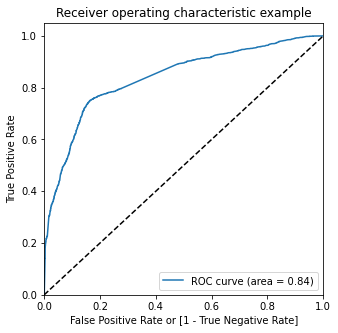

In [138]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

### Finding Optimal Cutoff Point

In [139]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.213445,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.222250,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.251344,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.639002,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.213445,3934,0,1,1,1,0,0,0,0,0,0,0


In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.381262  1.000000  0.000000  0.381262
0.1   0.1  0.440476  0.991079  0.101199  0.404569
0.2   0.2  0.647495  0.898621  0.492754  0.521903
0.3   0.3  0.798237  0.758313  0.822839  0.725087
0.4   0.4  0.802876  0.712895  0.858321  0.756129
0.5   0.5  0.789734  0.637470  0.883558  0.771344
0.6   0.6  0.772263  0.547851  0.910545  0.790521
0.7   0.7  0.752474  0.439578  0.945277  0.831926
0.8   0.8  0.734385  0.345093  0.974263  0.892034
0.9   0.9  0.694187  0.207624  0.994003  0.955224


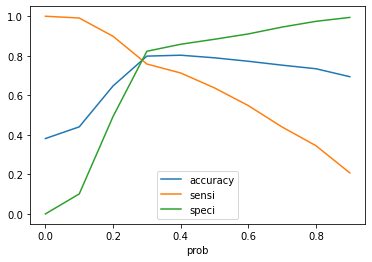

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

### Assigning Lead Score

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head(10)

,Converted,Conversion_Probability,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.213445,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.222250,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.251344,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.639002,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.213445,3934,0,1,1,1,0,0,0,0,0,0,0,0
5,1,0.974727,4844,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.139581,3297,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.994973,8071,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0.355705,987,0,1,1,1,1,0,0,0,0,0,0,1
9,1,0.775498,7423,1,1,1,1,1,1,1,1,1,0,0,1


### Assigning Lead Score

In [143]:
# Assigning Lead Score out of 100

y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Probability.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Probability,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.213445,1871,0,1,1,1,0,0,0,0,0,0,0,0,21
1,0,0.222250,6795,0,1,1,1,0,0,0,0,0,0,0,0,22
2,0,0.251344,3516,0,1,1,1,0,0,0,0,0,0,0,0,25
3,0,0.639002,8105,1,1,1,1,1,1,1,1,0,0,0,1,64
4,0,0.213445,3934,0,1,1,1,0,0,0,0,0,0,0,0,21


In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7926716141001855

In [145]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Sensitivity
TP / float(TP+FN)

0.7639902676399026

In [147]:
#  specificity
TN / float(TN+FP)

0.8103448275862069

In [148]:
# Calculate false postive rate - predicting conversion when lead has not converted
print(FP/ float(TN+FP))

0.1896551724137931


In [149]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7128263337116912


In [150]:
# Negative predictive value
print (TN / float(TN+ FN))

0.847843137254902


In [151]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3536,  466],
       [ 894, 1572]], dtype=int64)

In [152]:
## Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7713444553483808

In [153]:
## Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6374695863746959

### Using sklearn utilities for the same

In [154]:
from sklearn.metrics import precision_score, recall_score

In [155]:
#Precision

precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.7713444553483808

In [156]:
#Recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6374695863746959

### Precision Recall Trade Off

In [157]:

from sklearn.metrics import precision_recall_curve

In [158]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [159]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

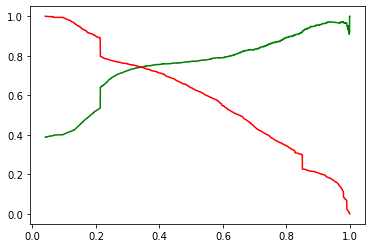

In [160]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the Test set:

In [161]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [162]:
X_test = X_test[col12]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Welingak Website,What is your current occupation_Working Professional,Do Not Email_Yes
4269,0.964504,0,0,0,0,0,0,0
2376,-0.885371,1,0,0,0,0,0,0
7766,-0.777416,0,1,0,0,0,1,0
9199,-0.885371,0,0,1,0,0,0,0
4359,-0.885371,1,0,0,0,0,0,0


In [163]:
X_test_sm = sm.add_constant(X_test)

In [164]:
y_test_pred = res.predict(X_test_sm)

In [165]:
y_test_pred[:10]

4269    0.450034
2376    0.850198
7766    0.747831
9199    0.213445
4359    0.850198
9186    0.338550
1631    0.533786
8963    0.204170
8007    0.230083
5324    0.171182
dtype: float64

In [166]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [167]:
# Let's see the head
y_pred_1.head()

,0
4269,0.450034
2376,0.850198
7766,0.747831
9199,0.213445
4359,0.850198


In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [169]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [170]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [172]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.450034
1,1,2376,0.850198
2,1,7766,0.747831
3,0,9199,0.213445
4,1,4359,0.850198


In [173]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Probability'})

In [174]:
y_pred_final.head()

,Converted,Prospect ID,Conversion_Probability
0,1,4269,0.450034
1,1,2376,0.850198
2,1,7766,0.747831
3,0,9199,0.213445
4,1,4359,0.850198


In [175]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.28 else 0)

In [176]:
y_pred_final.head()

,Converted,Prospect ID,Conversion_Probability,final_predicted
0,1,4269,0.450034,1
1,1,2376,0.850198,1
2,1,7766,0.747831,1
3,0,9199,0.213445,0
4,1,4359,0.850198,1


In [177]:
#Calculate the lead score
y_pred_final['Lead Score'] = y_pred_final.Conversion_Probability.apply(lambda x: x*100)

#sort based on 'lead score' in descending order
y_pred_final.sort_values(by=['Lead Score'],ascending=False,inplace=True)

# Print final predicted model
y_pred_final.head()

,Converted,Prospect ID,Conversion_Probability,final_predicted,Lead Score
546,1,3478,0.999661,1,99.966141
745,1,6383,0.999643,1,99.964256
1091,1,818,0.999572,1,99.957179
2405,1,5921,0.999379,1,99.937930
835,1,4613,0.998993,1,99.899340


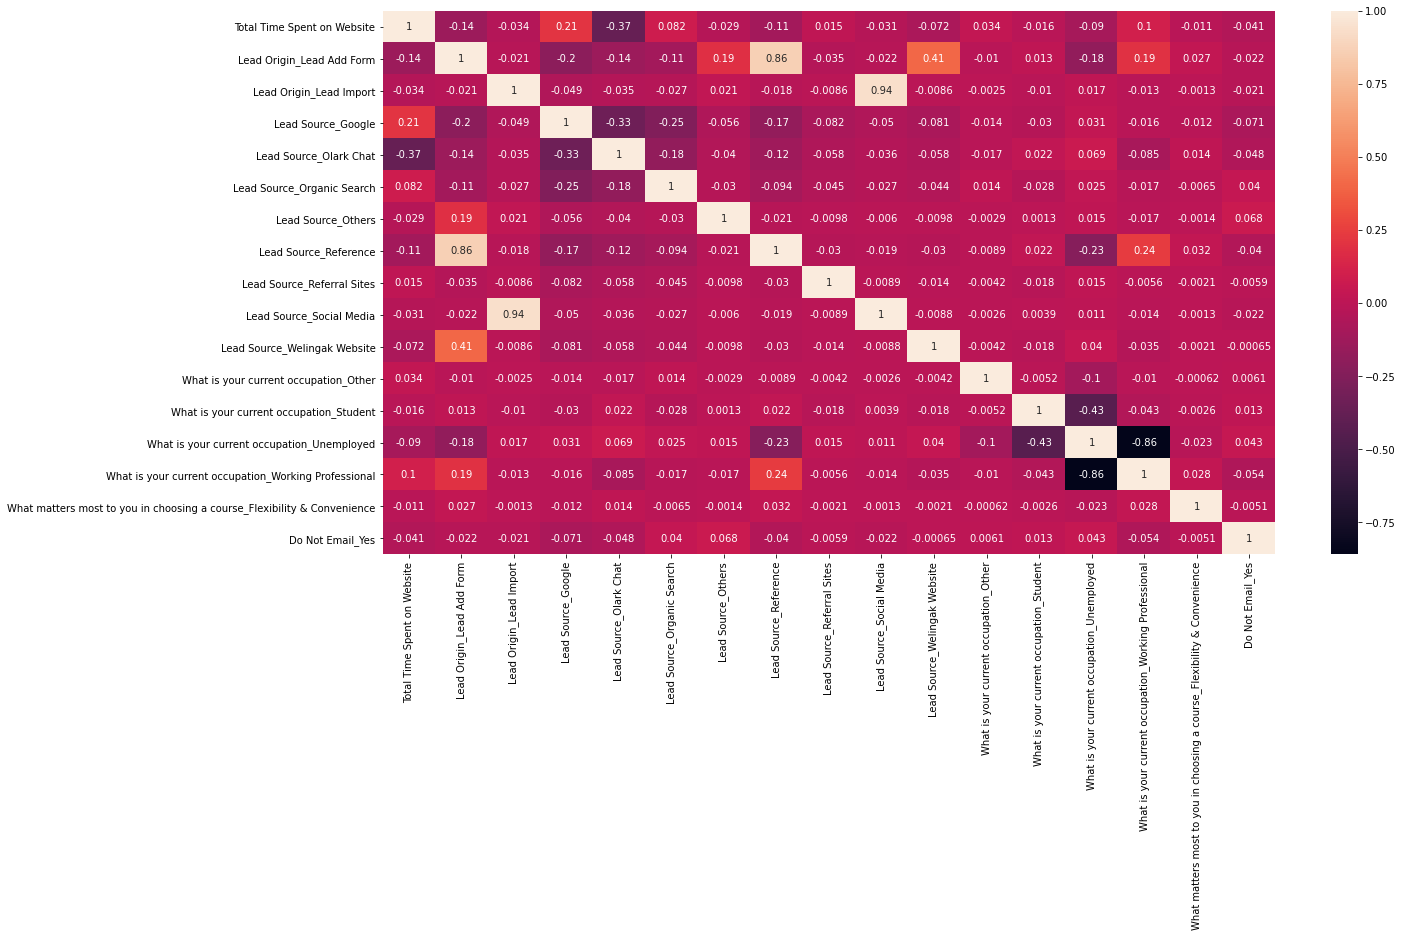

In [178]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col3].corr(),annot = True)
plt.show()

In [179]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.79004329004329

In [180]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1358,  319],
       [ 263,  832]], dtype=int64)

In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.7598173515981735

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.8097793679189028

In [184]:
# Calculate false postive rate - predicting conversion when lead has not converted
print(FP/ float(TN+FP))

0.19022063208109719


In [185]:
#Positive predictive value 

print (TP / float(TP+FP))

0.7228496959165943


In [186]:
# Negative predictive value
print (TN / float(TN+ FN))

0.83775447254781


In [187]:
#TP / TP + FP Precsion 

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7713444553483808

## 11. Conclusion:

We can see that our model has accuracy up to 79% on train data set and 79% on test data set.

We can now say that the lead conversion will be around 80% as required by the CEO of the company.

Columns: "final_predicted", "converted", "Conversion_Probability" are used to identify hot leads and cold leads.

**Cut off value used: 0.28**

- Any probability below 0.28 is considered to have a lower chance of getting converted (Cold Lead).
- Any probability above 0.28 is considered to have a higher chance of getting converted (Hot Lead).

### Final Model Statistics (Train Set):

- Accuracy Score %= 79.26
- Sensitivity %= 76.39
- Specificity %= 81.03
- False Positive Rate %= 18.96
- Positive Predictive Rate %= 71.28
- Negative Predictive Rate %= 84.78
- Precision %= 77.13
- Recall %= 63.74

### Final Model Statistic (Test Set):

- Accuracy Score %= 79
- Sensitivity %= 75.98
- Specificity %= 80.97
- False Positive Rate %= 19.02
- Positive Predictive Rate %= 72.28
- Negative Predictive Rate %= 83.77
- Precision %= 77.13

### Top features list based on the coefficients:

In [188]:
body = pd.read_html(res.summary().as_html())[1]
body = body[[0,1]]
body.columns = ['Features','Coeff']
body =body.iloc[2:]
body.sort_values(by=['Coeff'],ascending=False)

,Features,Coeff
3,Lead Origin_Lead Add Form,3.9665
8,What is your current occupation_Working Profes...,2.8671
7,Lead Source_Welingak Website,2.1256
2,Total Time Spent on Website,1.0973
5,Lead Source_Olark Chat,0.9261
4,Lead Source_Google,0.3319
6,Lead Source_Organic Search,0.2409
9,Do Not Email_Yes,-1.3498


#### Top 3 variables:

- Lead Origin
- Current Occupation
- Lead Source

#### Top 3 categorical variables:

- Lead Origin_Lead Add Form
- Current occupation_Working Professional
- Lead Source_Welingak Website

**Other observations:**
- People who fill the form with details have a very high positive correlation with conversion. (coeff = 3.96)
- Working professionals are highly probable to buy a course. (coeff = 2.86)
- Welingak Website is a good source to get leads. (coeff = 2.12)
- People who do not want to receive emails are not to be targetted as they won't be interested. (coeff = -1.34)

## 12. Recommendations:

- Consider **Lead Score > 75** as a high score.
- Target only the leads having a **score more than 75**.
- Leads with a score of 75-85 should be given to **more experienced and senior sales employees**.
- Leads with score of **more than 85** can be given to lesser experienced or junior employees, since the chances of conversion is high.